**About this file**


The dataset contains the following features:

**PatientID**: Unique identifier for each patient.

**State:** Geographic state of residence.

**Sex:** Gender of the patient.

**GeneralHealth:** Self-reported health status.

**AgeCategory:** Categorized age group of the patient.

**eightInMeters:** Height of the patient (in meters).

**WeightInKilograms:** Weight of the patient (in kilograms).

**BMI:** Body Mass Index, calculated from height and weight.

**HadHeartAttack:** Indicator of whether the patient had a heart attack.

**HadAngina:** Indicator of whether the patient experienced angina.

**HadStroke:** Indicator of whether the patient had a stroke.

**HadAsthma:** Indicator of whether the patient has asthma.

**HadSkinCancer:** Indicator of whether the patient had skin cancer.

**HadCOPD:** Indicator of whether the patient had chronic obstructive pulmonary disease (COPD).

**HadDepressiveDisorder:** Indicator of whether the patient was diagnosed with a depressive disorder.

**HadKidneyDisease:** Indicator of whether the patient had kidney disease.

**HadArthritis:** Indicator of whether the patient had arthritis.

**HadDiabetes:** Indicator of whether the patient had diabetes.

**DeafOrHardOfHearing:** Indicator of hearing impairment.

**BlindOrVisionDifficulty:** Indicator of vision impairment.

**DifficultyConcentrating:** Indicator of concentration difficulties.

**DifficultyWalking:** Indicator of walking difficulties.

**DifficultyDressingBathing:** Indicator of difficulties in dressing or bathing.

**DifficultyErrands:** Indicator of difficulties in running errands.

**SmokerStatus:** Status of whether the patient is a smoker.

**ECigaretteUsage:** Indicator of e-cigarette usage.

**ChestScan:** Indicator of whether the patient had a chest scan.

**RaceEthnicityCategory:** Race or ethnicity of the patient.

**AlcoholDrinkers:** Status of whether the patient consumes alcohol.

**HIVTesting:** Status of whether the patient was tested for HIV.

**FluVaxLast12** Status of whether the patient received a flu vaccine in the last 12 months.

**PneumoVaxEver:** Status of whether the patient ever received a pneumococcal vaccine.

**TetanusLast10Tdap:** Status of whether the patient received a tetanus vaccine in the last
10 years.

**HighRiskLastYear:** Indicator of whether the patient was at high risk in the last year.

**CovidPos:** Status of whether the patient tested positive for COVID-19.

**This dataset contains both medical history and health-related behavioral features, which are crucial for predicting outcomes like heart disease. It includes general demographic data, lifestyle factors, and specific health conditions.**

#Importing the necesary libraries

In [1]:

import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error




In [2]:
import folium
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon


In [3]:
# Download latest version
path = pd.read_excel('C:/Users/CPANA/Downloads/archive/Patients Data ( Used for Heart Disease Prediction ).xlsx')

print("Path to dataset files:", path)

Path to dataset files:         PatientID        State     Sex GeneralHealth   AgeCategory  \
0               1      Alabama  Female          Fair  Age 75 to 79   
1               2      Alabama  Female     Very good  Age 65 to 69   
2               3      Alabama    Male     Excellent  Age 60 to 64   
3               4      Alabama    Male     Very good  Age 70 to 74   
4               5      Alabama  Female          Good  Age 50 to 54   
...           ...          ...     ...           ...           ...   
237625     237626  Puerto Rico  Female          Good  Age 60 to 64   
237626     237627  Puerto Rico  Female          Good  Age 55 to 59   
237627     237628  Puerto Rico    Male          Fair  Age 45 to 49   
237628     237629  Puerto Rico  Female     Very good  Age 25 to 29   
237629     237630  Puerto Rico  Female          Good  Age 30 to 34   

        HeightInMeters  WeightInKilograms        BMI  HadHeartAttack  \
0                 1.63          84.820000  32.099998            

In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['NO COPD', 'Had COPD']); ax.yaxis.set_ticklabels(['NO COPD', 'Had COPD']) 
    plt.show() 

In [5]:
medical_df = path
medical_df

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,237626,Puerto Rico,Female,Good,Age 60 to 64,1.57,90.720001,36.580002,0,0,...,Not at all (right now),0,Hispanic,0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0
237626,237627,Puerto Rico,Female,Good,Age 55 to 59,1.70,72.570000,25.059999,0,1,...,Not at all (right now),0,Hispanic,0,1,0,0,"Yes, received Tdap",0,0
237627,237628,Puerto Rico,Male,Fair,Age 45 to 49,1.75,70.309998,22.889999,1,1,...,Not at all (right now),1,Hispanic,0,1,1,1,"Yes, received Tdap",1,0
237628,237629,Puerto Rico,Female,Very good,Age 25 to 29,1.57,46.720001,18.840000,0,0,...,Never used e-cigarettes in my entire life,0,Hispanic,0,1,0,0,"No, did not receive any tetanus shot in the pa...",0,1


In [6]:
medical_df.shape

(237630, 35)

In [7]:
medical_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PatientID                  237630 non-null  int64  
 1   State                      237630 non-null  object 
 2   Sex                        237630 non-null  object 
 3   GeneralHealth              237630 non-null  object 
 4   AgeCategory                237630 non-null  object 
 5   HeightInMeters             237630 non-null  float64
 6   WeightInKilograms          237630 non-null  float64
 7   BMI                        237630 non-null  float64
 8   HadHeartAttack             237630 non-null  int64  
 9   HadAngina                  237630 non-null  int64  
 10  HadStroke                  237630 non-null  int64  
 11  HadAsthma                  237630 non-null  int64  
 12  HadSkinCancer              237630 non-null  int64  
 13  HadCOPD                    23

In [8]:
medical_df.isnull().values.any() #there are no missing values, so we can proceed to an exploratory analsysis.

np.False_

In [8]:
Gender_info = medical_df['Sex'].value_counts()
Gender_info

Sex
Female    123293
Male      114337
Name: count, dtype: int64

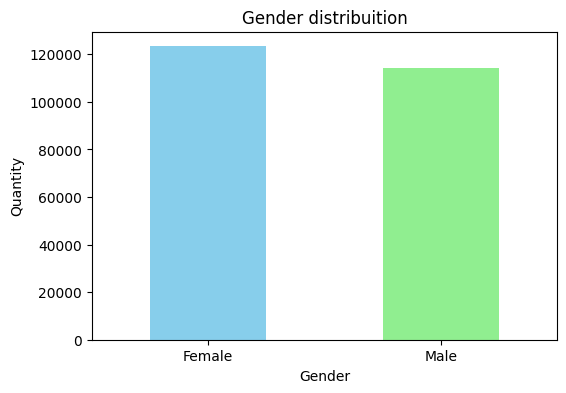

In [9]:
plt.figure(figsize=(6,4))
Gender_info.plot(kind ='bar', color = ['skyblue', 'lightgreen'])
plt.title ("Gender distribuition")
plt.xlabel('Gender')
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.show()

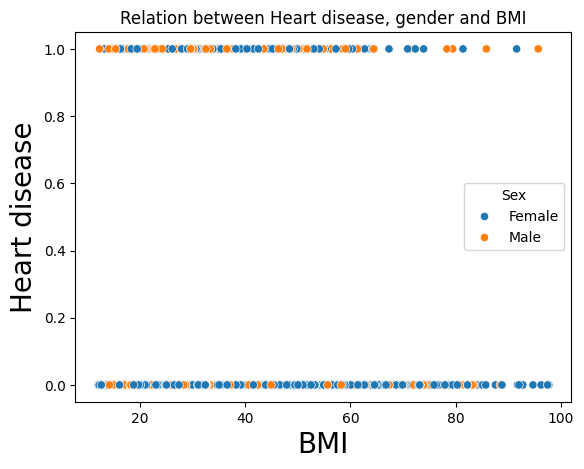

In [10]:
sns.scatterplot(y= 'HadHeartAttack', x= 'BMI', hue= 'Sex', data = medical_df)
plt.title ('Relation between Heart disease, gender and BMI')
plt.xlabel("BMI",fontsize=20)
plt.ylabel("Heart disease",fontsize=20)
plt.show()

In [11]:
US_Geo = r'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/refs/heads/master/data/geojson/us-states.json' # this link raw will help us with the code afterwards

In [12]:
import folium
import pandas as pd

# we create the map using this
USA_Map = folium.Map(location=[39.8283, -98.5795], zoom_start=5)





# Crear el mapa coroplético con folium
folium.Choropleth(
    geo_data=US_Geo, 
    name='choropleth',
    data=medical_df,
    columns=['State', 'BMI'], #This is only exploratory data, beacause the sample for this exercise won´t be as precise as the real data might be
    key_on='feature.properties.name',  
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='BMI by State'
).add_to(USA_Map)

# Shows map
USA_Map


In [13]:
medical_df['HadAsthma'].head(20)

0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: HadAsthma, dtype: int64

In [14]:
Asma_by_state = medical_df.groupby('State')['HadAsthma'].mean()
Asma_by_state.head()

State
Alabama       0.139894
Alaska        0.146452
Arizona       0.157865
Arkansas      0.141965
California    0.158300
Name: HadAsthma, dtype: float64

In [15]:
# we create the map using this
USA_Map = folium.Map(location=[39.8283, -98.5795], zoom_start=5)





# Crear el mapa coroplético con folium
folium.Choropleth(
    geo_data=US_Geo, 
    name='choropleth',
    data=Asma_by_state,
    columns=['State', 'HadAsthma'], #This is only exploratory data, beacause the sample for this exercise won´t be as precise as the real data might be
    key_on='feature.properties.name',  
    fill_color='viridis',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Asthma by state. Closer to 1 means more affected'
).add_to(USA_Map)

# Shows map
USA_Map


In [16]:
Depression_by_state = medical_df.groupby('State')['HadDepressiveDisorder'].mean()
Depression_by_state.head()

State
Alabama       0.213298
Alaska        0.186774
Arizona       0.197661
Arkansas      0.246789
California    0.206624
Name: HadDepressiveDisorder, dtype: float64

In [17]:
USA_Map = folium.Map(location=[39.8283, -98.5795], zoom_start=5)





# Crear el mapa coroplético con folium
folium.Choropleth(
    geo_data=US_Geo, 
    name='choropleth',
    data=Depression_by_state,
    columns=['State', 'HadAsthma'], #This is only exploratory data, beacause the sample for this exercise won´t be as precise as the real data might be
    key_on='feature.properties.name',  
    fill_color='viridis',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Depression by state. Closer to 1 means more affected'
).add_to(USA_Map)

# Shows map
USA_Map

In [18]:
strokes_by_age = medical_df.groupby('AgeCategory')
strokes_by_age.head(5)


,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,168,Alabama,Female,Fair,Age 18 to 24,1.60,45.360001,17.709999,0,0,...,Never used e-cigarettes in my entire life,0,"Black only, Non-Hispanic",0,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
168,169,Alabama,Male,Good,Age 30 to 34,1.80,79.379997,24.410000,0,0,...,Use them every day,0,"White only, Non-Hispanic",1,0,0,0,"No, did not receive any tetanus shot in the pa...",0,0
194,195,Alabama,Male,Good,Age 25 to 29,1.78,105.690002,33.430000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0
225,226,Alabama,Male,Fair,Age 30 to 34,1.60,56.700001,22.139999,0,0,...,Not at all (right now),1,"Black only, Non-Hispanic",1,1,0,0,"No, did not receive any tetanus shot in the pa...",0,0


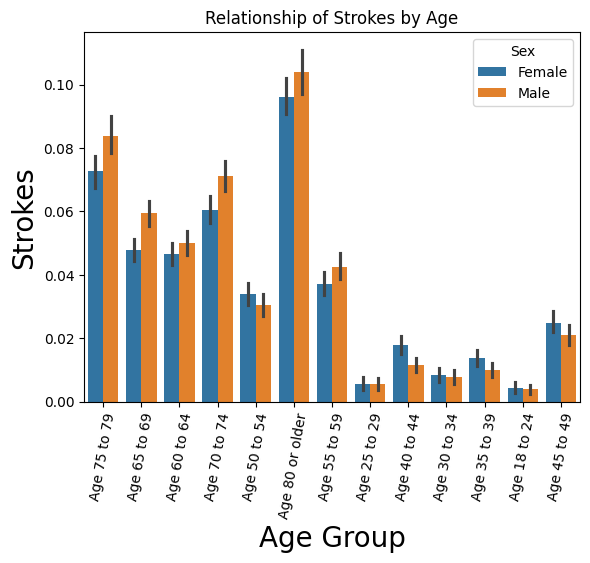

In [19]:
sns.barplot(y='HadStroke', x='AgeCategory', hue='Sex', data=medical_df)
plt.title("Relationship of Strokes by Age")
plt.xlabel("Age Group", fontsize=20)
plt.ylabel("Strokes", fontsize=20)
plt.xticks(rotation=80, fontsize=10)  # Rotate and adjust font size of X-axis labels
plt.show()
